# Sortwanie szybkie
## Opis algorytmu
Jest to algorytm sortujący. Sortuje on dane poprzez wybranie pewnej liczby z tablicy, a następnie przekładanie liczb w tej tablicy tak aby po lewej stronie znalazły się liczby mniejsze od wybranej a po prawej większe. Następnie wykonuje tą samą operację dla tablicy po lewej i po prawej stronie.
## Kod

In [2]:
# Zwraca indeks taki że, po lewej stronie są wartości mniejsze od niego, a po prawej większe.
def partition(tab, low, high):
    # Wybieram indeks high jako wartość względem której będę porównywał elementy i nazwę ją pivot.
    pivot = tab[high]
    # mid to indeks pivot, za którym będą znajdować się wartości większe od pivot.,
    # na początek ustawiam go na pierwszą wartość.
    mid = low
    # Dla każdego elementu w zakresie low-high
    for i in range(low, high):
        # Jeżeli wartość w tablicy jest mniejsza od pivot
        if tab[i] < pivot:
            # Zamieniam miejscami w tablicy obecną wartość z mid
            tab[i], tab[mid] = tab[mid], tab[i]
            # zwiększam mid o 1
            mid+=1
    tab[mid], tab[high] = tab[high], tab[mid]
    return mid
            
    
def quicksort(tab, low, high):
    if low < high:
        mid = partition(tab,low,high)
        quicksort(tab,low,mid-1)
        quicksort(tab,mid+1,high)

## Schematy blokowe
### Funkcja sortująca
![quicksort](Quicksort/Quicksort.png)
### Funkcja przestawiająca dane w tablicy
![quicksort](Quicksort/Partition.png)
## Analiza matematyczna
Złożoność tego algorytmu w dużej mierze zależy od tego względem której liczby będziemy dzielić i przestawiać tablicę. Możemy wyróżnić trzy przypadki:
### Przypadek pesymistyczny
Jako, że zawsze wybieramy ostatnią liczbę algorytm ten będzie dokonywał największej ilości porównań dla tablicy posortowanej tj. przejdzie po całej pętli i podzieli ją na dwie tablice, z czego pierwsza będzie zawierała wszystkie elementy oprócz ostatniego. Zatem wykona się ona $ (n-1) + (n-2) + ... + 2 + 1$ razy co daje w sumie $ S = \frac{1 + (n-1)}{2} * n = \frac{n^{2}}{2}$

### Pozostałe przypadki
W pozostałych przypadkach zakładamy, że trafiamy na liczę która jest w przybliżeniu medianą liczb sortowanych. Wtedy algorytm dzieli tablicę na dwie części i osiąga złożoność podobną do sortowania przez scalanie $ O(nlog{n}) $.

# Doświadczenia:
## Doświadczenie Q1
- Zakres liczb: -20-20,
- Ilość liczb: 10,
- Sposób wybierania: losowy

In [26]:
import random
tablica_przed_posortowaniem = [random.randrange(-20,21) for i in range(0,10)]

print("Przed posortowaniem: ")
print(tablica_przed_posortowaniem)

posort = list.copy(tablica_przed_posortowaniem)
quicksort(posort,0,len(posort)-1)

print("Sortowanie szybkie: ")
print(posort)

Przed posortowaniem: 
[0, 15, -20, -8, 3, -2, 20, 18, 17, 8]
Sortowanie szybkie: 
[-20, -8, -2, 0, 3, 8, 15, 17, 18, 20]


## Doświadczenie Q2
- Zakres liczb: -1000-1000,
- Ilość liczb: 1 000 000,
- Sposób wybierania: losowy,

In [19]:
import random
from timeit import default_timer as timer
tablica_przed_posortowaniem = [random.randrange(-1000,1001) for i in range(0,1000000)]
posort = list.copy(tablica_przed_posortowaniem)

qstart = timer()
quicksort(posort,0,len(posort)-1)
qend = timer()

print("Sortowanie szybkie: "+str(qend - qstart)+ " sekund")

Sortowanie szybkie: 28.029196699999375 sekund


## Doświadczenie Q3
- Zakres licznb: 1-1000,
- Ilość liczb: od 1 do 1000,
- Sposób wybierania: posortowane,

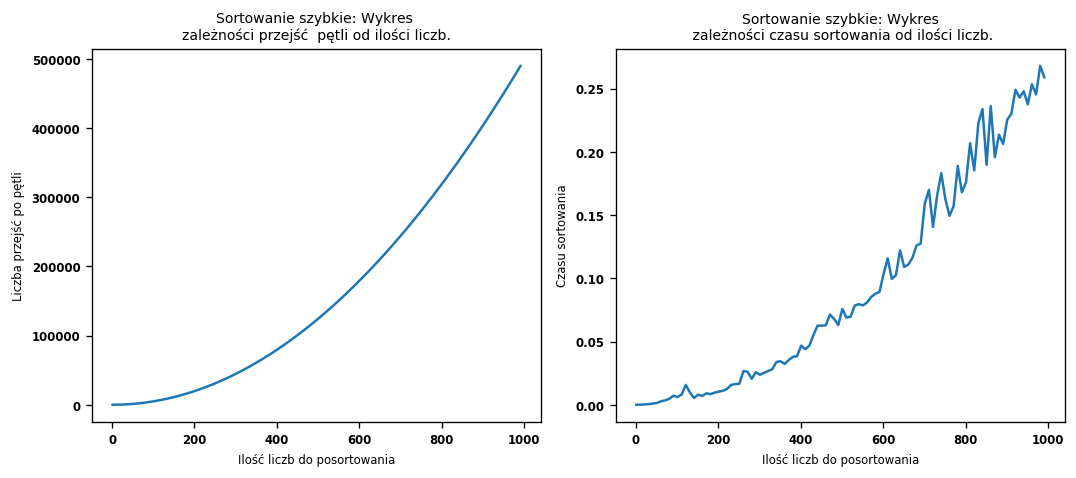

In [19]:
import random
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import matplotlib

# Zwraca indeks taki że, po lewej stronie są wartości mniejsze od niego, a po prawej większe.
def partition(tab, low, high):
    # Wybieram indeks high jako wartość względem której będę porównywał elementy i nazwę ją pivot.
    pivot = tab[high]
    # mid to indeks pivot, za którym będą znajdować się wartości większe od pivot.,
    #na początek ustawiam go na pierwszą wartość.s
    mid = low
    # Dla każdego elementu w zakresie low-high
    for i in range(low, high):
        global liczba_iteracji
        liczba_iteracji += 1
        # Jeżeli wartość w tablicy jest mniejsza od pivot
        if tab[i] < pivot:
            global liczba_zamian
            liczba_zamian +=1
            # Zamieniam miejscami w tablicy obecną wartość z mid
            tab[i], tab[mid] = tab[mid], tab[i]
            # zwiększam mid o 1
            mid+=1
    liczba_zamian+=1
    tab[mid], tab[high] = tab[high], tab[mid]
    return mid
            
    
def quicksort(tab, low, high):
    if low < high:
        mid = partition(tab,low,high)
        quicksort(tab,low,mid-1)
        quicksort(tab,mid+1,high)
        
        
def benchmark_3():
    lista_iteracji = []
    lista_zmian = []
    czasy = []
    ile = 1000
    rang = []
    for liczby in range(1,ile,10):
        global liczba_iteracji
        global liczba_zamian
        liczba_iteracji = 0
        liczba_zamian = 0
        tablica_przed_posortowaniem = [i for i in range(1,liczby)]
        posort = list.copy(tablica_przed_posortowaniem)

        rang.append(liczby)
        qstart = timer()
        quicksort(posort,0,len(posort)-1)
        qend = timer()
        
        lista_iteracji.append(liczba_iteracji)
        lista_zmian.append(liczba_zamian)
        czasy.append(qend - qstart)
        
    width_in_inches = 9
    height_in_inches =4
    dots_per_inch = 120

    plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
    
    plt.subplot(1,2,1)
    plt.plot(rang, lista_iteracji)
    plt.title("Sortowanie szybkie: Wykres \nzależności przejść  pętli od ilości liczb.")
    plt.ylabel("Liczba przejść po pętli")
    plt.xlabel("Ilość liczb do posortowania")
    
    plt.subplot(1,2,2)
    plt.plot(rang, czasy)
    plt.title("Sortowanie szybkie: Wykres\n zależności czasu sortowania od ilości liczb.")
    plt.ylabel("Czasu sortowania")
    plt.xlabel("Ilość liczb do posortowania")
    
    plt.tight_layout()
    plt.show()
    #print(lista_iteracji)
    #print(lista_zmian)
    #print(czasy)
        
liczba_iteracji = 0
liczba_zamian = 0
benchmark_3()

## Doświadczenie Q4
- Zakres licznb: 0-10000,
- Ilość liczb: od 1 do 10000,
- Sposób wybierania: losowe,

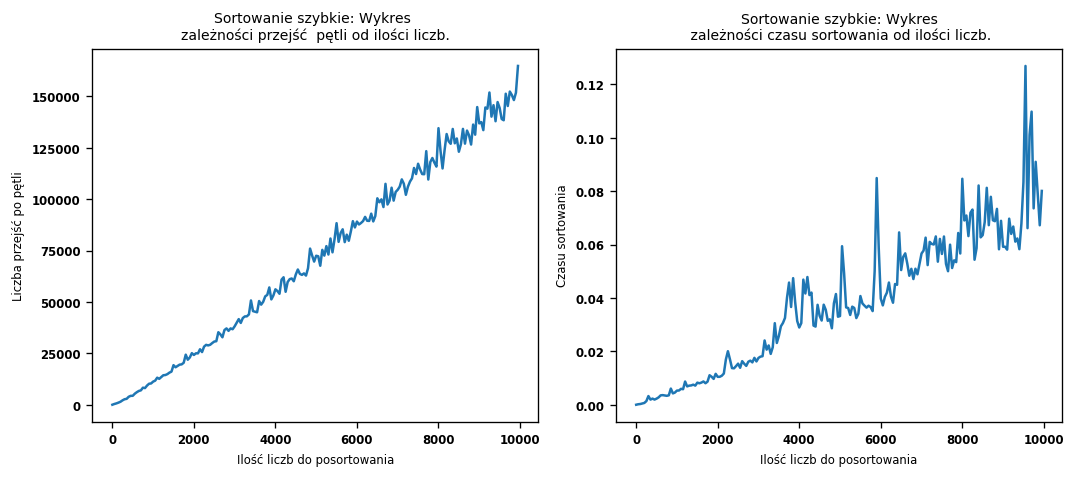

In [24]:
import random
from timeit import default_timer as timer
import matplotlib.pyplot as plt

# Zwraca indeks taki że, po lewej stronie są wartości mniejsze od niego, a po prawej większe.
def partition(tab, low, high):
    # Wybieram indeks high jako wartość względem której będę porównywał elementy i nazwę ją pivot.
    pivot = tab[high]
    # mid to indeks pivot, za którym będą znajdować się wartości większe od pivot.,
    #na początek ustawiam go na pierwszą wartość.s
    mid = low
    # Dla każdego elementu w zakresie low-high
    for i in range(low, high):
        global liczba_iteracji
        liczba_iteracji += 1
        # Jeżeli wartość w tablicy jest mniejsza od pivot
        if tab[i] < pivot:
            global liczba_zamian
            liczba_zamian +=1
            # Zamieniam miejscami w tablicy obecną wartość z mid
            tab[i], tab[mid] = tab[mid], tab[i]
            # zwiększam mid o 1
            mid+=1
    liczba_zamian+=1
    tab[mid], tab[high] = tab[high], tab[mid]
    return mid
            
    
def quicksort(tab, low, high):
    if low < high:
        mid = partition(tab,low,high)
        quicksort(tab,low,mid-1)
        quicksort(tab,mid+1,high)
        

def benchmark_3():
    lista_iteracji = []
    lista_zmian = []
    czasy = []
    ile = 10000
    rang = []
    for liczby in range(1,ile,50):
        global liczba_iteracji
        global liczba_zamian
        global tablica_przed_posortowaniem
        liczba_iteracji = 0
        liczba_zamian = 0
        #tablica_przed_posortowaniem = [random.randrange(1,1001) for i in range(1,liczby)]
        
        posort = list.copy(tablica_przed_posortowaniem[0:liczby])

        qstart = timer()
        quicksort(posort,0,len(posort)-1)
        qend = timer()
        rang.append(liczby)
        lista_iteracji.append(liczba_iteracji)
        lista_zmian.append(liczba_zamian)
        czasy.append(qend - qstart)
    
    width_in_inches = 9
    height_in_inches =4
    dots_per_inch = 120

    plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
    
    plt.subplot(1,2,1)
    plt.plot(rang, lista_iteracji)
    plt.title("Sortowanie szybkie: Wykres \nzależności przejść  pętli od ilości liczb.")
    plt.ylabel("Liczba przejść po pętli")
    plt.xlabel("Ilość liczb do posortowania")
    #plt.yscale("log")
    
    plt.subplot(1,2,2)
    plt.plot(rang, czasy)
    plt.title("Sortowanie szybkie: Wykres\n zależności czasu sortowania od ilości liczb.")
    plt.ylabel("Czasu sortowania")
    plt.xlabel("Ilość liczb do posortowania")
    #plt.yscale("log")
    
    plt.tight_layout()
    plt.show()
    #print(lista_iteracji)
    #print(lista_zmian)
    #print(czasy)
        
liczba_iteracji = 0
liczba_zamian = 0
tablica_przed_posortowaniem = [random.randrange(0,10001) for i in range(1,10001)]
benchmark_3()

## Wnioski
- Jak widać po doświadczeniu Q3, algorytm ten w tej wersji nie radzi sobie dobrze z liczbami które są posortowane, ponieważ zawsze wybiera ostatnią liczbę a co za tym idzie, za każdym razem zmiejsza wielkość tablicy do posortowania tylko o 1.
- Doświadczenia Q1 i Q2 pokazują że algorytm działa i sortuje liczby, zarówno ujemne jak i dodatnie.
- Algorytm bardzo dobrze radzi sobie z dużą liczbą losowych liczb, osiągając przy tym 